In [ ]:
# Network Analysis on Facebook Page https://www.facebook.com/2017-%E5%8F%B0%E5%A4%A7%E9%9B%BB%E6%A9%9F%E9%80%B1-free-style-1132875553513949/
# Refer to the readme.md for related data descriptions
# Some of the codes below are from the networkx's official tutorial
# 2017/10/23
# Gary Chen

In [24]:
import networkx as nx
import csv
import matplotlib.pyplot as plt
import numpy as np

In [25]:
#read in the gdf file(has been modified as csv file)
with open("page_1132875553513949_2017_10_22_15_23_35.csv", 'r', encoding = 'utf8')as f:
	_data = csv.reader(f)
	data = list(_data)

In [26]:
#parse the csv into a graph
G = nx.Graph()
D = nx.DiGraph()
#find the end of nodedef
for a in range(len(data)):
	if data[a][0] == 'edgedef>node1 VARCHAR':
		nodeEnd = a

user = nx.Graph()
post = nx.Graph()

#add all the nodes
for a in range(1,nodeEnd):
    if data[a][2] == 'post':
        #print(data[a][0])
        G.add_node(data[a][0], bipartite = '0')
        G.add_node(data[a][0])
        post.add_node(data[a][0])
    elif data[a][2] == 'user':
        #print(data[a][0])
        G.add_node(data[a][0], bipartite = '1')
        G.add_node(data[a][0])
        user.add_node(data[a][0])

#add all the edges
for a in range(nodeEnd + 1,len(data)):
    G.add_edge(data[a][0],data[a][1])
    D.add_edge(data[a][0],data[a][1])

#generate the two projections, one for user, one for post

for a in G.nodes():
	if G.node[a]['bipartite'] == '0':
		for b in G.neighbors(a):
			for c in G.neighbors(a):
				if b != c:
					user.add_edge(b,c)

for a in G.nodes():
	if G.node[a]['bipartite'] == '1':
		for b in G.neighbors(a):
			for c in G.neighbors(a):
				if b != c:
					post.add_edge(b,c)

In [27]:
# self defined function to replace the nx.degree() below
def out_degree(D):
    y = {}
    for a in D.nodes():
        if D.out_degree(a) != 0:
            y[a] = D.out_degree(a)
    return y

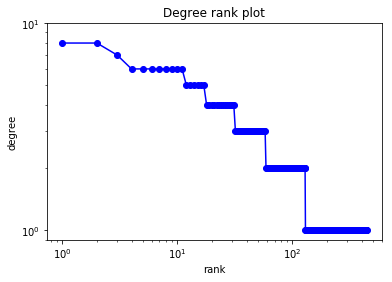

In [28]:
#plot the degree distribution and save it

degree_sequence=sorted(out_degree(D).values(),reverse=True) # degree sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

plt.savefig("degree_distribution_user.png")
plt.show()

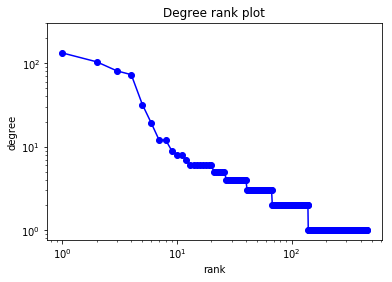

In [29]:
#plot the degree distribution and save it

degree_sequence=sorted(nx.degree(D).values(),reverse=True) # degree sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

plt.savefig("degree_distribution_post_user.png")
plt.show()

In [21]:
nx.write_graphml(user, "user.graphml")
nx.write_graphml(post, "post.graphml")
nx.write_graphml(user, "user_mycentral.graphml")
nx.write_gml(G, "user_post_mycentral.gml")
nx.write_gpickle(G, "user_post_mycentral.gpickle")

In [30]:
#find out the eigenvector centrality without using eigenvector_centrality()
# two ways to find eigenvalues
# one with networkx.adjacency_spectrum()
spec = nx.adjacency_spectrum(user)
biggest = 0
for a,i in zip(spec,range(len(spec))):
    if np.absolute(biggest) < np.absolute(a):
        biggest = a
        index = i

In [37]:
# one with numpy.linalg.eig()
A = nx.adjacency_matrix(user)
a = A.toarray()
M,N = np.linalg.eig(a)

In [38]:
# find the largest eigenvalue and the corresponding eigenvector
biggest = 0
for a,i in zip(M,range(len(M))):
    if np.absolute(biggest) < np.absolute(a):
        index = i
        biggest = a

In [11]:
for a,i in zip(user.nodes(), range(len(user.nodes()))):
    user.node[a]['spec'] = np.absolute(N[0][i])
    user.node[a]['eig'] = 0
for a,i in zip(user.nodes(), range(len(user.nodes()))):
    for b in user.neighbors(a):
        user.node[a]['eig'] += user.node[b]['spec']

In [12]:
# compute the centrality of every node with respect to the chosen eigenvector
my_central = []
for a,i in zip(user.nodes(), range(len(user.nodes()))):
    my_central.append(user.node[a]['eig'])

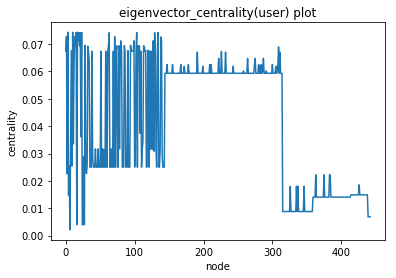

In [35]:
# plot the result and save it
lt.plot(central)
plt.title("eigenvector_centrality(user) plot")
plt.ylabel("centrality")
plt.xlabel("node")
plt.savefig("eigenvector_centrality(user).png")
plt.show()

In [33]:
# the result of directly using the function eigenvector_centrality
centrality = nx.eigenvector_centrality(user)
_biggest = 0
for a,i in zip(centrality, range(len(centrality))):
    if _biggest < centrality[a]:
        _biggest = centrality[a]

In [34]:
central = []
for a in centrality:
    central.append(centrality[a])

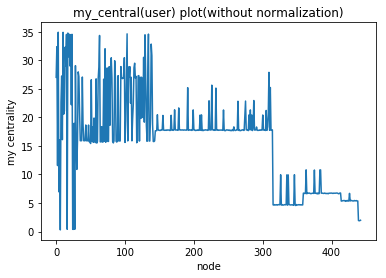

In [36]:
n = []
for a in range(len(my_central)):
    n.append(np.absolute(my_central[a]))
plt.plot(n)
plt.title("my_central(user) plot(without normalization)")
plt.ylabel("my centrality")
plt.xlabel("node")
plt.savefig("my_centrality(user).png")
plt.show()